### Homework 06

In [1]:
from joy import *

## Super Grid V2

This homework requires the following code.

In [2]:
def super_grid_v2(shape_maker, n):
    size = 300/n
    r = size/2
    x = -150+r
    y = -150+r
    shapes = []
    for j in range(n):
        for i in range(n):
            c = shape_maker(size, row=j, column=i, n=n)|translate(x=x, y=y)
            shapes.append(c)
            x = x+size
        y = y+size
        x = -150+r
    return combine(shapes)

A blank shape.

In [3]:
blank = circle(r=0, stroke="none")

The `concentric_circles` function is updated to handle 0 and negative values for `n`.

In [4]:
def concentric_circles(radius, n):
    if n <= 0:
        return blank

    delta = radius/n
    circles = [circle(r=i*delta) for i in range(1, n+1)]
    return combine(circles)

## Utilities

Here are some utilities for you to solve this exercise. 

Install the python package called tabulate to print tables by running the following command.

In [5]:
!python -m pip install tabulate

### Show Table

The following `show_table` function takes an experession using `row`, `column` and `n` and shows the value of that expression for every cell in a grid of size `n`.

Please note that you need to specify the expression as a string.

In [6]:
from tabulate import tabulate

def show_table(n, expr):
    rows = list(range(n))[::-1]
    columns = list(range(n))
    headers = [""] + [f"C{c}" for c in columns]
    data = [[f"R{row}"] +[eval(expr, {"row": row, "column": column, "n": n}) for column in columns] for row in rows]    
    print(tabulate(data, headers=headers))

In [7]:
show_table(5, "column")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     0     1     2     3     4
R3     0     1     2     3     4
R2     0     1     2     3     4
R1     0     1     2     3     4
R0     0     1     2     3     4


In [8]:
show_table(5, "column + 1")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     1     2     3     4     5
R3     1     2     3     4     5
R2     1     2     3     4     5
R1     1     2     3     4     5
R0     1     2     3     4     5


You can explore interesting patterns with `show_table`, before using it with `super_grid_v2`.

You can try with interesting functions.

In [9]:
show_table(5, "min(row, column)")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     0     1     2     3     4
R3     0     1     2     3     3
R2     0     1     2     2     2
R1     0     1     1     1     1
R0     0     0     0     0     0


In [10]:
show_table(5, "max(row, column)")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     4     4     4     4     4
R3     3     3     3     3     4
R2     2     2     2     3     4
R1     1     1     2     3     4
R0     0     1     2     3     4


In [11]:
show_table(5, "row-column")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     4     3     2     1     0
R3     3     2     1     0    -1
R2     2     1     0    -1    -2
R1     1     0    -1    -2    -3
R0     0    -1    -2    -3    -4


The `abs` function computes the absolute value of a number. If we give a negative number, it converts it to a positive number.

In [12]:
show_table(5, "abs(row-column)")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     4     3     2     1     0
R3     3     2     1     0     1
R2     2     1     0     1     2
R1     1     0     1     2     3
R0     0     1     2     3     4


In [13]:
show_table(5, "n-row")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     1     1     1     1     1
R3     2     2     2     2     2
R2     3     3     3     3     3
R1     4     4     4     4     4
R0     5     5     5     5     5


The other interesting mathematical function is remainder. In Python, we use the `%` operator to compute the remainder.

In [14]:
7 % 2

1

In [15]:
7 % 4

3

We can use remainder to create interesting repeating patterns.

In [16]:
show_table(12, "row%3")

       C0    C1    C2    C3    C4    C5    C6    C7    C8    C9    C10    C11
---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  -----  -----
R11     2     2     2     2     2     2     2     2     2     2      2      2
R10     1     1     1     1     1     1     1     1     1     1      1      1
R9      0     0     0     0     0     0     0     0     0     0      0      0
R8      2     2     2     2     2     2     2     2     2     2      2      2
R7      1     1     1     1     1     1     1     1     1     1      1      1
R6      0     0     0     0     0     0     0     0     0     0      0      0
R5      2     2     2     2     2     2     2     2     2     2      2      2
R4      1     1     1     1     1     1     1     1     1     1      1      1
R3      0     0     0     0     0     0     0     0     0     0      0      0
R2      2     2     2     2     2     2     2     2     2     2      2      2
R1      1     1     1     1     1     1     1     1     1     1 

## Problem 1

Make the following pattern.

![](images/hw06-supergrid-1.svg)

In [17]:
def make_circles(size, row, column, n):
    #print(f"make_circles size={size} row={row} column={column}")
    return concentric_circles(radius = size/2, n=(column%3)+1)

In [18]:
show_table(5, "column%3")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     0     1     2     0     1
R3     0     1     2     0     1
R2     0     1     2     0     1
R1     0     1     2     0     1
R0     0     1     2     0     1


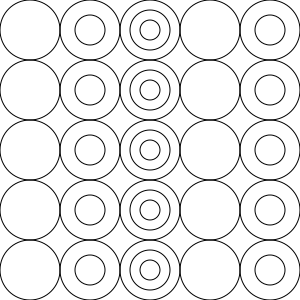

In [19]:
def make_circles(size, row, column, n):
    #print(f"make_circles size={size} row={row} column={column}")
    return concentric_circles(radius = size/2, n=(column%3)+1)

super_grid_v2(make_circles, 5)

## Problem 2

Make the following pattern.

![](images/hw06-supergrid-2.svg)


In [20]:
show_table(5, "n-row+column")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     1     2     3     4     5
R3     2     3     4     5     6
R2     3     4     5     6     7
R1     4     5     6     7     8
R0     5     6     7     8     9


In [21]:
from wizard import *

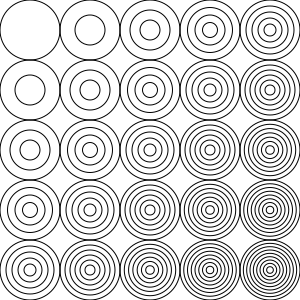

In [22]:
def make_shape(size, row, column, n):
    return concentric_circles(radius=size/2, n=n-row+column)

super_grid_v2(make_shape, 5)

## Problem 3

Make the following pattern.

![](images/hw06-supergrid-3.svg)


In [23]:
show_table(5, "max(n-row, column+1)")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     1     2     3     4     5
R3     2     2     3     4     5
R2     3     3     3     4     5
R1     4     4     4     4     5
R0     5     5     5     5     5


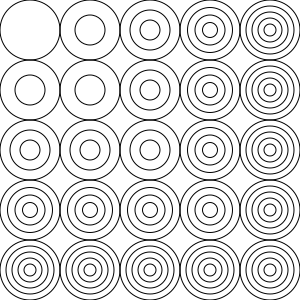

In [24]:
def make_shape(size, row, column, n):
    return concentric_circles(radius=size/2, n=max(n-row, column+1))

super_grid_v2(make_shape, 5)

## Problem 4

Make the following pattern.

![](images/hw06-supergrid-4.svg)


In [25]:
show_table(5, "abs(n-row-column-1)+1")

      C0    C1    C2    C3    C4
--  ----  ----  ----  ----  ----
R4     1     2     3     4     5
R3     2     1     2     3     4
R2     3     2     1     2     3
R1     4     3     2     1     2
R0     5     4     3     2     1


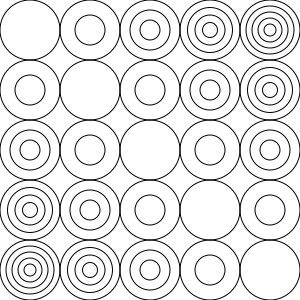

In [26]:
def make_shape(size, row, column, n):
    return concentric_circles(radius=size/2, n=abs(n-row-column-1)+1)

super_grid_v2(make_shape, 5)

## Problem 5

Make the following pattern.

![](images/hw06-supergrid-5.svg)

In [27]:
show_table(12, "column%3+1")

       C0    C1    C2    C3    C4    C5    C6    C7    C8    C9    C10    C11
---  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  -----  -----
R11     1     2     3     1     2     3     1     2     3     1      2      3
R10     1     2     3     1     2     3     1     2     3     1      2      3
R9      1     2     3     1     2     3     1     2     3     1      2      3
R8      1     2     3     1     2     3     1     2     3     1      2      3
R7      1     2     3     1     2     3     1     2     3     1      2      3
R6      1     2     3     1     2     3     1     2     3     1      2      3
R5      1     2     3     1     2     3     1     2     3     1      2      3
R4      1     2     3     1     2     3     1     2     3     1      2      3
R3      1     2     3     1     2     3     1     2     3     1      2      3
R2      1     2     3     1     2     3     1     2     3     1      2      3
R1      1     2     3     1     2     3     1     2     3     1 

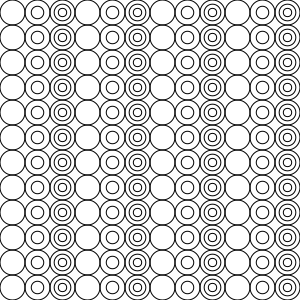

In [28]:
def make_shape(size, row, column, n):
    return concentric_circles(radius=size/2, n=column%3+1)

super_grid_v2(make_shape, 12)